<a href="https://colab.research.google.com/github/ishmeetsinghsaini11/nyc-taxi-fare-prediction/blob/main/(EDA)New_York_City_Taxi_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#New York City Taxi Fare Prediction

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

#This file mainly focuses on EDA of the data


#1. Download the DataSet


In [ ]:
!pip install numpy pandas opendatasets

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd


In [ ]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'

In [ ]:
%%time
od.download(dataset_url)

Skipping, found downloaded files in "./new-york-city-taxi-fare-prediction" (use force=True to force download)
CPU times: user 307 µs, sys: 70 µs, total: 377 µs
Wall time: 386 µs


In [ ]:
data_dir = "/content/new-york-city-taxi-fare-prediction"

## we will be using some cmd prompts to view dataset as the dataset downloaded is large (size > 1.56 GB)


In [ ]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Nov  5 13:17 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Nov  5 13:17 sample_submission.csv
-rw-r--r-- 1 root root 960K Nov  5 13:17 test.csv
-rw-r--r-- 1 root root 5.4G Nov  5 13:18 train.csv


## we can see most of the size is occupied by train.csv

so we need to work with data bit smartly as we cannot load whole dataset into the data frame as it will take too much time and resource to analyse


In [ ]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [ ]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [ ]:
# Sample submission set
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [ ]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 /content/new-york-city-taxi-fare-prediction/train.csv


In [ ]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 /content/new-york-city-taxi-fare-prediction/test.csv


In [ ]:
# No. of lines in sample submission set
!wc -l {data_dir}/sample_submission.csv

9915 /content/new-york-city-taxi-fare-prediction/sample_submission.csv


Observations:



*   This is Supervised Learning regression problem
*   Training Data is 5.4 GB in size

*   Training set has > 55 Million Rows
*   Test set is much smaller ( < 10000 rows)

*   Training set has 8 columns

        1.   key
        2.   fare_amount
        3.   pickup_datetime
        4.   pickup_longitude
        5.   pickup_latitude
        6.   dropoff_longitude
        7.   dropoff_latitude
        8.   passenger_count


*   Test set has all the columns except 'fare_amount' (which is going to be our target column)


*   Submission file should contain 'key' and 'fare_amount'














##Load training set

as training set is very large we are just gonna load a fraction of it for analyzing it easily as larger data frame will take too much time and resourse to process

In [ ]:
import random

In [ ]:
# fraction size
sample_frac = 0.01

In [ ]:
%%time
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(",")

dtypes = {
    'fair_amount': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(raw_idx):
  if raw_idx == 0:
    return False
  return random.random() > sample_frac

# no i am not gonna use 42 XD
random.seed(24)

df= pd.read_csv(data_dir+'/train.csv',
              usecols = selected_cols,
              dtype=dtypes,
              parse_dates = ['pickup_datetime'],
              skiprows= skip_row)

CPU times: user 1min 13s, sys: 2.24 s, total: 1min 16s
Wall time: 1min 22s


In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,5.70,2010-11-16 19:40:00+00:00,-74.000549,40.727493,-74.005035,40.719124,1.0
1,4.90,2010-07-12 09:44:33+00:00,-73.983246,40.734653,-73.991280,40.738918,1.0
2,19.00,2014-08-21 10:21:17+00:00,-73.974022,40.762829,-73.940842,40.726467,1.0
3,33.07,2010-06-09 14:53:47+00:00,-73.862762,40.769066,-73.984032,40.752842,2.0
4,8.50,2011-10-21 08:18:49+00:00,-73.990387,40.731178,-74.002098,40.708050,2.0
...,...,...,...,...,...,...,...
554274,10.90,2011-12-28 12:17:35+00:00,-73.998138,40.723602,-74.002304,40.755829,1.0
554275,12.50,2012-02-04 21:25:15+00:00,-73.980751,40.759827,-73.917526,40.763573,1.0
554276,4.90,2009-10-24 17:51:31+00:00,-73.977036,40.751724,-73.986046,40.757889,1.0
554277,4.90,2012-05-29 09:13:00+00:00,-73.981514,40.740898,-73.973770,40.747154,5.0


##Load Test Set

In [ ]:
test_df = pd.read_csv(data_dir + '/test.csv', dtype = dtypes, parse_dates = ['pickup_datetime'])

In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


#2. Explore & analyze the dataset


##Training Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554279 entries, 0 to 554278
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        554279 non-null  float64            
 1   pickup_datetime    554279 non-null  datetime64[ns, UTC]
 2   pickup_longitude   554279 non-null  float32            
 3   pickup_latitude    554279 non-null  float32            
 4   dropoff_longitude  554275 non-null  float32            
 5   dropoff_latitude   554275 non-null  float32            
 6   passenger_count    554279 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


## as we can see there are nearly no null values

just nearly 4 null values in the the dropoffs which we can directly drop off the rows

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554275 entries, 0 to 554278
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        554275 non-null  float64            
 1   pickup_datetime    554275 non-null  datetime64[ns, UTC]
 2   pickup_longitude   554275 non-null  float32            
 3   pickup_latitude    554275 non-null  float32            
 4   dropoff_longitude  554275 non-null  float32            
 5   dropoff_latitude   554275 non-null  float32            
 6   passenger_count    554275 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 23.3 MB


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,554275.000000,554275.000000,554275.000000,554275.000000,554275.000000,554275.000000
mean,11.328839,-72.507568,39.922226,-72.517044,39.929317,1.682989
std,9.716227,13.958018,10.157737,15.338972,12.508522,1.331179
min,-50.000000,-2635.390137,-2501.000977,-3370.712158,-3114.278564,0.000000
25%,6.000000,-73.992050,40.735058,-73.991394,40.734131,1.000000
50%,8.500000,-73.981812,40.752724,-73.980141,40.753262,1.000000
75%,12.500000,-73.967110,40.767159,-73.963699,40.768097,2.000000
max,265.000000,3442.185059,2181.223633,3442.185059,3350.046631,208.000000


In [ ]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:08:24+0000', tz='UTC'),
 Timestamp('2015-06-30 23:51:39+0000', tz='UTC'))

Observations-Training set:


*   Sample of 550+ rows are picked which can be easily used for analysis
*   there was some missing data nearly 4 rows with no Dropoff valeus which are dropped

*   'fare_amount' ranges from \$-50.0 to \$265
*   'passenger_count' ranges from 0 to 208

*   There seem to be some errors in the latitude & longitude values


*   Dates range from 1st Jan 2009 to 30th June 2015
*   The dataset takes up ~23 MB of space in the RAM


##Test Set

In [ ]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278756
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [ ]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Observations-Test set:


*   9914 rows of data
*   No missing values

*   1 to 6 passengers (we can limit training data to this range)
*   Latitudes lie between 40 and 42

*   Longitudes lie between -75 and -72
*   Pickup dates range from Jan 1st 2009 to Jun 30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.







#3. Prepare the dataset for ML training


*   Split Training & Validation Set
*   Fill/Remove Missing Values
*   Extract Inputs & Outputs

          *   Training
          *   Validation
          *   Test















##Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.


Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(df, test_size = 0.2, random_state = 24)

In [ ]:
len(train_df), len(val_df)

(443420, 110855)

#### Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)

In [ ]:
train_df = train_df.dropna()
val_df = val_df.dropna()

In [ ]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
input_cols = 'pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(",")
target_col = 'fare_amount'

#### Training

In [ ]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [ ]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
430806,-73.980064,40.785885,-73.982086,40.774769,1.0
98653,-73.977219,40.743111,-73.983467,40.696419,2.0
137682,-73.988464,40.773880,-73.971001,40.756001,1.0
112411,-73.973579,40.794838,-73.969559,40.797626,1.0
484160,-73.978493,40.741417,-74.005486,40.727833,1.0
...,...,...,...,...,...
478613,-74.010155,40.709919,-73.988869,40.696625,4.0
516443,0.000000,0.000000,0.000000,0.000000,1.0
211137,-73.994591,40.766041,-74.003868,40.753323,1.0
899,-73.992081,40.725998,-74.003761,40.729397,1.0


In [ ]:
train_targets

,fare_amount
430806,4.9
98653,18.5
137682,10.0
112411,4.0
484160,9.7
...,...
478613,6.9
516443,3.7
211137,5.0
899,4.9


#### Validation

In [ ]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [ ]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
251895,-73.981026,40.744774,-74.003189,40.735409,5.0
60212,-73.790184,40.644024,-73.937340,40.669388,1.0
207126,-73.995499,40.724792,-74.004601,40.730446,1.0
266232,-73.988945,40.729053,-73.981903,40.724487,1.0
391660,-73.974213,40.746910,-74.008301,40.747417,1.0
...,...,...,...,...,...
197650,-74.002800,40.728088,-73.979973,40.726898,5.0
105544,-73.966103,40.770870,-73.959427,40.777420,1.0
46840,-73.957657,40.765778,-73.989906,40.756634,1.0
86234,-73.993477,40.743118,-73.987427,40.738853,2.0


In [ ]:
val_targets

,fare_amount
251895,6.9
60212,29.3
207126,4.1
266232,3.7
391660,10.1
...,...
197650,8.0
105544,6.0
46840,10.5
86234,5.0


#### Test

In [ ]:
test_inputs = test_df[input_cols]

In [ ]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746140,1.0
3,-73.981163,40.767807,-73.990448,40.751637,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


## 4. Train Hardcoded & Baseline Models

- Hardcoded model: always predict average fare
- Baseline model: Linear regression

For evaluation the dataset uses RMSE error:
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [ ]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [ ]:
mean_model = MeanRegressor()

In [ ]:
mean_model.fit(train_inputs, train_targets)

In [ ]:
mean_model.mean

np.float64(11.323914482883046)

In [ ]:
train_preds = mean_model.predict(train_inputs)

In [ ]:
train_preds

array([11.32391448, 11.32391448, 11.32391448, ..., 11.32391448,
       11.32391448, 11.32391448])

In [ ]:
val_preds = mean_model.predict(val_inputs)

In [ ]:
val_preds

array([11.32391448, 11.32391448, 11.32391448, ..., 11.32391448,
       11.32391448, 11.32391448])

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
train_rmse = root_mean_squared_error(train_targets, train_preds)

In [ ]:
train_rmse

9.702550453740356

In [ ]:
val_rmse = root_mean_squared_error(val_targets, val_preds)

In [ ]:
val_rmse

9.770704912161175

### Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg_model = LinearRegression()

In [ ]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [ ]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.250218, 11.346702, 11.250264, ..., 11.250173, 11.25023 ,
       11.250256], dtype=float32)

In [ ]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.6356945, 11.250854 , 11.250221 , ..., 11.250266 , 11.346617 ,
       11.25023  ], dtype=float32)

In [ ]:
train_rmse = root_mean_squared_error(train_targets, train_preds)
train_rmse

9.701440644938224

In [ ]:
val_rmse = root_mean_squared_error(val_targets, val_preds)
val_rmse

9.769382648153192

The linear regression model is off by $9.769, which isn't much better than simply predicting the average.


This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.


However, now we have a baseline that our other models should ideally beat.

## 5. Make Predictions and Submit to Kaggle

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [ ]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746140,1.0
3,-73.981163,40.767807,-73.990448,40.751637,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [ ]:
test_preds = linreg_model.predict(test_inputs)
test_preds

array([11.25028 , 11.250244, 11.250276, ..., 11.732739, 11.73216 ,
       11.732024], dtype=float32)

In [ ]:
submission_df = pd.read_csv(data_dir + '/sample_submission.csv')

In [ ]:
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [ ]:
def generate_submission(test_preds, fname):
  sub_df = pd.read_csv(data_dir + '/sample_submission.csv')
  sub_df['fare_amount'] = test_preds
  sub_df.to_csv(fname, index = None)

In [ ]:
generate_submission(test_preds, 'linreg_submission.csv')

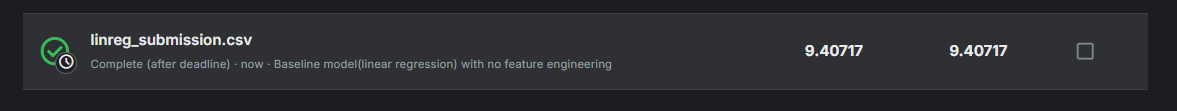

Score of the BaseLine linear Regression model is 9.40 which is bad so we will perform feature engineering


## 6. Feature Engineering


- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks

Exercise: We're going to apply all of the above together, but you should observer the effect of adding each feature individually.

### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour


In [ ]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [ ]:
add_dateparts(train_df, 'pickup_datetime')

In [ ]:
add_dateparts(test_df, 'pickup_datetime')

In [ ]:
add_dateparts(val_df, 'pickup_datetime')

In [ ]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
430806,4.9,2010-06-16 11:03:07+00:00,-73.980064,40.785885,-73.982086,40.774769,1.0,2010,6,16,2,11
98653,18.5,2012-07-30 20:53:31+00:00,-73.977219,40.743111,-73.983467,40.696419,2.0,2012,7,30,0,20
137682,10.0,2013-03-01 08:26:55+00:00,-73.988464,40.773880,-73.971001,40.756001,1.0,2013,3,1,4,8
112411,4.0,2013-09-10 22:31:11+00:00,-73.973579,40.794838,-73.969559,40.797626,1.0,2013,9,10,1,22
484160,9.7,2010-04-30 09:36:47+00:00,-73.978493,40.741417,-74.005486,40.727833,1.0,2010,4,30,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...
478613,6.9,2009-07-18 14:47:11+00:00,-74.010155,40.709919,-73.988869,40.696625,4.0,2009,7,18,5,14
516443,3.7,2009-05-07 00:16:40+00:00,0.000000,0.000000,0.000000,0.000000,1.0,2009,5,7,3,0
211137,5.0,2014-10-05 05:09:00+00:00,-73.994591,40.766041,-74.003868,40.753323,1.0,2014,10,5,6,5
899,4.9,2011-10-26 01:00:37+00:00,-73.992081,40.725998,-74.003761,40.729397,1.0,2011,10,26,2,1


In [ ]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
251895,6.9,2009-09-13 10:52:00+00:00,-73.981026,40.744774,-74.003189,40.735409,5.0,2009,9,13,6,10
60212,29.3,2009-02-22 14:57:00+00:00,-73.790184,40.644024,-73.937340,40.669388,1.0,2009,2,22,6,14
207126,4.1,2010-04-29 22:53:31+00:00,-73.995499,40.724792,-74.004601,40.730446,1.0,2010,4,29,3,22
266232,3.7,2012-08-18 04:47:31+00:00,-73.988945,40.729053,-73.981903,40.724487,1.0,2012,8,18,5,4
391660,10.1,2012-04-17 20:09:00+00:00,-73.974213,40.746910,-74.008301,40.747417,1.0,2012,4,17,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...
197650,8.0,2014-05-04 23:24:00+00:00,-74.002800,40.728088,-73.979973,40.726898,5.0,2014,5,4,6,23
105544,6.0,2012-09-24 13:41:00+00:00,-73.966103,40.770870,-73.959427,40.777420,1.0,2012,9,24,0,13
46840,10.5,2011-10-22 16:25:41+00:00,-73.957657,40.765778,-73.989906,40.756634,1.0,2011,10,22,5,16
86234,5.0,2014-12-31 08:52:00+00:00,-73.993477,40.743118,-73.987427,40.738853,2.0,2014,12,31,2,8


In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0,2015,1,27,1,13
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0,2015,1,27,1,13
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1.0,2011,10,8,5,11
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1.0,2012,12,1,5,21
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0,2012,12,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0,2015,5,10,6,12
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0,2015,1,12,0,17
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0,2015,4,19,6,20
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0,2015,1,31,5,1


### Remove Outliers and Invalid Data

There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [ ]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
count,443420.000000,443420.000000,443420.000000,443420.000000,443420.000000,443420.000000,443420.000000,443420.000000,443420.000000,443420.000000,443420.000000
mean,11.323914,-72.507225,39.923126,-72.522217,39.930531,1.683330,2011.739746,6.263860,15.715834,3.042889,13.509614
std,9.702561,14.646957,10.955516,16.372101,13.636032,1.339109,1.859943,3.436916,8.696904,1.951691,6.516510
min,-50.000000,-2635.390137,-2501.000977,-3370.712158,-3114.278564,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992073,40.735031,-73.991402,40.734108,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981827,40.752678,-73.980148,40.753246,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967155,40.767110,-73.963737,40.768070,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,265.000000,3442.185059,2181.223633,3442.185059,3350.046631,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


In [ ]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420
std,0.042799,0.033542,0.039093,0.035436,1.278756,1.803347,3.353272,8.838482,1.994451,6.868584
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6

In [ ]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [ ]:
train_df = remove_outliers(train_df)

In [ ]:
val_df = remove_outliers(val_df)

### Add Distance Between Pickup and Drop

We can use the haversine distance:
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [ ]:
# Haversine distance
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [ ]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [ ]:
%%time
add_trip_distance(train_df)

CPU times: user 23 ms, sys: 11.9 ms, total: 34.9 ms
Wall time: 35.2 ms


/tmp/ipython-input-3331564106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])


In [ ]:
add_trip_distance(val_df)

/tmp/ipython-input-3331564106.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])


In [ ]:
add_trip_distance(test_df)

In [ ]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
430806,4.9,2010-06-16 11:03:07+00:00,-73.980064,40.785885,-73.982086,40.774769,1.0,2010,6,16,2,11,1.246941
98653,18.5,2012-07-30 20:53:31+00:00,-73.977219,40.743111,-73.983467,40.696419,2.0,2012,7,30,0,20,5.215192
137682,10.0,2013-03-01 08:26:55+00:00,-73.988464,40.773880,-73.971001,40.756001,1.0,2013,3,1,4,8,2.471029
112411,4.0,2013-09-10 22:31:11+00:00,-73.973579,40.794838,-73.969559,40.797626,1.0,2013,9,10,1,22,0.458735
484160,9.7,2010-04-30 09:36:47+00:00,-73.978493,40.741417,-74.005486,40.727833,1.0,2010,4,30,4,9,2.728379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452757,10.1,2011-06-09 20:04:00+00:00,-73.988762,40.777756,-74.007469,40.741024,1.0,2011,6,9,3,20,4.375137
478613,6.9,2009-07-18 14:47:11+00:00,-74.010155,40.709919,-73.988869,40.696625,4.0,2009,7,18,5,14,2.323226
211137,5.0,2014-10-05 05:09:00+00:00,-73.994591,40.766041,-74.003868,40.753323,1.0,2014,10,5,6,5,1.615190
899,4.9,2011-10-26 01:00:37+00:00,-73.992081,40.725998,-74.003761,40.729397,1.0,2011,10,26,2,1,1.053702


In [ ]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0,2015,1,27,1,13,2.321899
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0,2015,1,27,1,13,2.423777
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1.0,2011,10,8,5,11,0.618015
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1.0,2012,12,1,5,21,1.959681
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0,2012,12,1,5,21,5.383829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0,2015,5,10,6,12,2.123265
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0,2015,1,12,0,17,3.269084
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0,2015,4,19,6,20,19.171534
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0,2015,1,31,5,1,8.338154


In [ ]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
251895,6.9,2009-09-13 10:52:00+00:00,-73.981026,40.744774,-74.003189,40.735409,5.0,2009,9,13,6,10,2.136661
60212,29.3,2009-02-22 14:57:00+00:00,-73.790184,40.644024,-73.937340,40.669388,1.0,2009,2,22,6,14,12.721812
207126,4.1,2010-04-29 22:53:31+00:00,-73.995499,40.724792,-74.004601,40.730446,1.0,2010,4,29,3,22,0.991377
266232,3.7,2012-08-18 04:47:31+00:00,-73.988945,40.729053,-73.981903,40.724487,1.0,2012,8,18,5,4,0.780469
391660,10.1,2012-04-17 20:09:00+00:00,-73.974213,40.746910,-74.008301,40.747417,1.0,2012,4,17,1,20,2.870477
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197650,8.0,2014-05-04 23:24:00+00:00,-74.002800,40.728088,-73.979973,40.726898,5.0,2014,5,4,6,23,1.926818
105544,6.0,2012-09-24 13:41:00+00:00,-73.966103,40.770870,-73.959427,40.777420,1.0,2012,9,24,0,13,0.919335
46840,10.5,2011-10-22 16:25:41+00:00,-73.957657,40.765778,-73.989906,40.756634,1.0,2011,10,22,5,16,2.898007
86234,5.0,2014-12-31 08:52:00+00:00,-73.993477,40.743118,-73.987427,40.738853,2.0,2014,12,31,2,8,0.695645


drop the columns not in use
[pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude]

In [ ]:
cols_to_drop = 'pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude'.split(',')

In [ ]:
cols_to_drop

['pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude']

In [ ]:
train_df.drop(cols_to_drop, axis=1, inplace=True)

/tmp/ipython-input-1487390375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(cols_to_drop, axis=1, inplace=True)


In [ ]:
train_df

,fare_amount,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
430806,4.9,1.0,2010,6,16,2,11,1.246941
98653,18.5,2.0,2012,7,30,0,20,5.215192
137682,10.0,1.0,2013,3,1,4,8,2.471029
112411,4.0,1.0,2013,9,10,1,22,0.458735
484160,9.7,1.0,2010,4,30,4,9,2.728379
...,...,...,...,...,...,...,...,...
452757,10.1,1.0,2011,6,9,3,20,4.375137
478613,6.9,4.0,2009,7,18,5,14,2.323226
211137,5.0,1.0,2014,10,5,6,5,1.615190
899,4.9,1.0,2011,10,26,2,1,1.053702


In [ ]:
val_df.drop(cols_to_drop, axis=1, inplace=True)

/tmp/ipython-input-2672651872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df.drop(cols_to_drop, axis=1, inplace=True)


In [ ]:
val_df

,fare_amount,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
251895,6.9,5.0,2009,9,13,6,10,2.136661
60212,29.3,1.0,2009,2,22,6,14,12.721812
207126,4.1,1.0,2010,4,29,3,22,0.991377
266232,3.7,1.0,2012,8,18,5,4,0.780469
391660,10.1,1.0,2012,4,17,1,20,2.870477
...,...,...,...,...,...,...,...,...
197650,8.0,5.0,2014,5,4,6,23,1.926818
105544,6.0,1.0,2012,9,24,0,13,0.919335
46840,10.5,1.0,2011,10,22,5,16,2.898007
86234,5.0,2.0,2014,12,31,2,8,0.695645


In [ ]:
test_df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
test_df

,key,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
0,2015-01-27 13:08:24.0000002,1.0,2015,1,27,1,13,2.321899
1,2015-01-27 13:08:24.0000003,1.0,2015,1,27,1,13,2.423777
2,2011-10-08 11:53:44.0000002,1.0,2011,10,8,5,11,0.618015
3,2012-12-01 21:12:12.0000002,1.0,2012,12,1,5,21,1.959681
4,2012-12-01 21:12:12.0000003,1.0,2012,12,1,5,21,5.383829
...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,6.0,2015,5,10,6,12,2.123265
9910,2015-01-12 17:05:51.0000001,6.0,2015,1,12,0,17,3.269084
9911,2015-04-19 20:44:15.0000001,6.0,2015,4,19,6,20,19.171534
9912,2015-01-31 01:05:19.0000005,6.0,2015,1,31,5,1,8.338154


## 7. Export datasets

In [ ]:
train_df.to_parquet('train.parquet')

In [ ]:
val_df.to_parquet('val.parquet')

In [ ]:
test_df.to_parquet('test.parquet')